In [64]:
df = pd.DataFrame({'team': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
                   'points': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12],
                   'blocks': [4, 7, 7, 6, 5, 8, 9, 10]})
d = {}
count = 1
for i in range(len(df)):
    if i == 0:
        d[count] = pd.DataFrame()
        d[count] = df.loc[i]
    elif i % 6 == 0:
        count += 1
        d[count] = pd.DataFrame()
        d[count] = df.loc[i]
    else:
        d[count].loc[len(d[count])] = df.loc[i]
            
print(d[2])

team                                                        C
points                                                      9
rebounds                                                    9
blocks                                                      9
4           team         C
points       4
rebounds    12
b...
Name: 6, dtype: object


/var/folders/_f/zphg680s3wz08nw0k614mn4w0000gn/T/ipykernel_13599/2289766369.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[count].loc[len(d[count])] = df.loc[i]
/var/folders/_f/zphg680s3wz08nw0k614mn4w0000gn/T/ipykernel_13599/2289766369.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[count].loc[len(d[count])] = df.loc[i]
/var/folders/_f/zphg680s3wz08nw0k614mn4w0000gn/T/ipykernel_13599/2289766369.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [65]:
"""Import CSV Guppy data"""
import pandas as pd
import time
import numpy as np
#matplotlib ipympl
import matplotlib.pyplot as plt
#matplotlib inline
from scipy import interpolate

import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [99]:
"""Format notebook to work with CSV Guppy data"""
df = pd.read_csv("L230204.CSV")
columns = [
        'Date', 'Time', 'Lat', 'Lon', 'Speed m/s', 'Distance km',
        'RPM 1', 'Motor Load 1 %', 'Motor Torque 1 %', 'Motor Temp 1 C',
        # 'RPM 2', 'Motor Load 2 %%', 'Motor Torque 2 %%', 'Motor Temp 2 C',
        # 'RPM 3', 'Motor Load 3 %%', 'Motor Torque 3 %%', 'Motor Temp 3 C',
        # 'RPM 4', 'Motor Load 4 %%', 'Motor Torque 4 %%', 'Motor Temp 4 C',
        # 'Depth m',
        # 'Temp Source 1', 'Temp 1 C',
        # 'Temp Source 2', 'Temp 2 C',
        # 'Temp Source 3', 'Temp 3 C',
        # 'Temp Source 4', 'Temp 4 C',
        'Pack Current 1 A', 'Pack Voltage 1 V', 'Pack Temp 1 C', 'SOC 1 %',
        # 'Pack Current 2 A', 'Pack Voltage 2 V', 'Pack Temp 2 C', 'SOC 2 %%',
        # 'Pack Current 3 A', 'Pack Voltage 3 V', 'Pack Temp 3 C', 'SOC 3 %%',
        # 'Pack Current 4 A', 'Pack Voltage 4 V', 'Pack Temp 4 C', 'SOC 4 %%'
        ]
df.dtypes
df = df[columns]


trip_counter = 1
trip = {}
trip[trip_counter] = pd.DataFrame()
trip[1][columns] = None
for i in range(len(df)):
    if(df.Lat.loc[i] == 'Lat'):
        trip_counter += 1
        trip[trip_counter] = pd.DataFrame()
        trip[trip_counter][df.loc[i]] = None
    else:
        trip[trip_counter].loc[len(trip[trip_counter])] = df.loc[i]


"""Adjust time format"""

for j in range(trip_counter):
    trip[j+1].Time = (pd.to_datetime(trip[j+1]['Time'].str.strip(), format = '%H:%M:%S'))
    adjusted_time = np.array(0)
    x = 0
    for i in range(len(trip[j+1].Time)):
        if i+1 >= len(trip[j+1].Time):
            break
        x += (trip[j+1].Time[i+1] - trip[j+1].Time[i]).total_seconds()
        adjusted_time = np.append(adjusted_time,x)
        
    trip[j+1]['Time'] = adjusted_time.astype(float)
    trip[j+1]['Lat'] = trip[j+1]['Lat'].astype(float)
    trip[j+1]['Lon'] = trip[j+1]['Lon'].astype(float)
    trip[j+1]['Speed m/s'] = trip[j+1]['Speed m/s'].astype(float)
    trip[j+1]['Distance km'] = trip[j+1]['Distance km'].astype(float)
    trip[j+1]['RPM 1'] = trip[j+1]['RPM 1'].astype(int)
    trip[j+1]['Motor Load 1 %'] = trip[j+1]['Motor Load 1 %'].astype(int)
    trip[j+1]['Motor Torque 1 %'] = trip[j+1]['Motor Torque 1 %'].astype(int)
    trip[j+1]['Motor Temp 1 C'] = trip[j+1]['Motor Temp 1 C'].astype(float)
    trip[j+1]['Pack Current 1 A'] = trip[j+1]['Pack Current 1 A'].astype(float)
    trip[j+1]['Pack Voltage 1 V'] = trip[j+1]['Pack Voltage 1 V'].astype(float)
    trip[j+1]['Pack Temp 1 C'] = trip[j+1]['Pack Temp 1 C'].astype(float)
    trip[j+1]['SOC 1 %'] = trip[j+1]['SOC 1 %'].astype(int)

In [131]:
#print(trip[2].info())
print(trip[2]['SOC 1 %'])

0        0
1        0
2        0
3        0
4        0
        ..
5393    36
5394    36
5395    36
5396    36
5397    36
Name: SOC 1 %, Length: 5398, dtype: int64


/var/folders/_f/zphg680s3wz08nw0k614mn4w0000gn/T/ipykernel_13599/2481899995.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  dist_remaining = batt/cached_avg      # This will need to change because we won't know the average with real-time data
/var/folders/_f/zphg680s3wz08nw0k614mn4w0000gn/T/ipykernel_13599/2481899995.py:20: RuntimeWarning: invalid value encountered in double_scalars
  roll_consumption = roll_batt_consumed/roll_dist_traveled                                        #kWh/nm


0          0.0
1          1.0
2          2.0
3          3.0
4          4.0
         ...  
6761    6825.0
6762    6826.0
6763    6827.0
6764    6828.0
6765    6829.0
Name: Time, Length: 6766, dtype: float64
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf

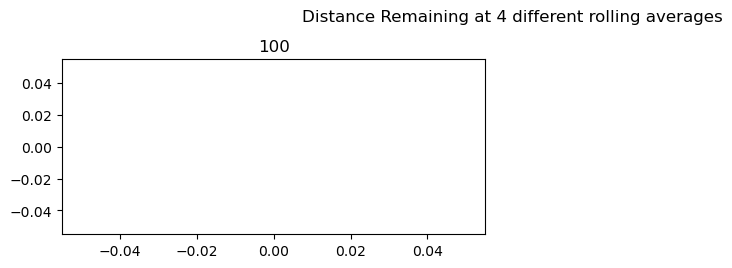

In [106]:
c

batt_consumed = (trip[1]['SOC 1 %'].iloc[0] - trip[1]['SOC 1 %'].iloc[-1])*batt_full/100   # kWh
dist_traveled = (trip[1]['Distance km'].iloc[-1] - trip[1]['Distance km'].iloc[0])*nm_conversion  # nm [1km = 0.539957nm]
time_spent = trip[1]['Time'].iloc[-1] - trip[1]['Time'].iloc[0]
avg_consumption_rate = batt_consumed/dist_traveled

Nlist = [50, 100, 200, 500, 1000]
distances = []
cached_avg = avg_consumption_rate    # This will need to be a locally stored value based on historical data. We want this to be conservative.
for N in Nlist:
    dist_list = []
    for i in range(len(trip[1])):
        batt = trip[1]['SOC 1 %'].iloc[i]*batt_full/100
        roll_batt_consumed = (trip[1]['SOC 1 %'].iloc[i-N] - trip[1]['SOC 1 %'].iloc[i])*batt_full/100      #kWh
        roll_dist_traveled = (trip[1]['Distance km'].iloc[i] - trip[1]['Distance km'].iloc[i-30])*nm_conversion   #nm
        roll_consumption = roll_batt_consumed/roll_dist_traveled                                        #kWh/nm

        if i < N or roll_consumption==0:
            dist_remaining = batt/cached_avg      # This will need to change because we won't know the average with real-time data
            #print('%d Consumption Rate: %.2f kWh/nm | Dist Remaining %.1f nm' % (i, cached_avg, dist_remaining), end=' \r')
            # time.sleep(0.001)
        else:
            dist_remaining = batt/roll_consumption   #nm
            #print('%d Batt: %.1f | Consumption Rate: %.2f kWh/nm | Dist Remaining: %.2f nm' % (i, batt, roll_consumption, dist_remaining), end=' \r')
            # time.sleep(.001)

        dist_list.append(dist_remaining)

    distances.append(dist_list)

plt.figure(figsize = (12,5))
plt.suptitle('Distance Remaining at 4 different rolling averages')

plt.subplot(2,2,1)
plt.title(Nlist[1])
plt.plot(trip[1]['Time'], distances[1])

print(trip[1]['Time'])
print(distances[1])

-7.92


Text(0, 0.5, 'Distance Remaining (nm)')

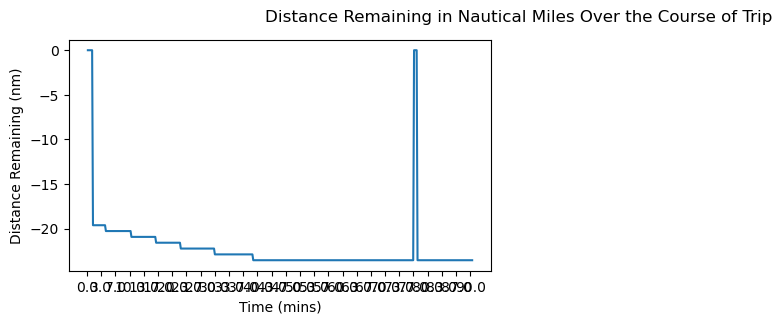

In [132]:
batt_cap = 22   # kWh
batt_health = 1.00 # %
batt_full = batt_cap*batt_health
nm_conversion = 0.539957

batt_consumed = (trip[2]['SOC 1 %'].iloc[0] - trip[2]['SOC 1 %'].iloc[-1])*batt_full/100   # kWh
dist_traveled = (trip[2]['Distance km'].iloc[-1] - trip[2]['Distance km'].iloc[0])*nm_conversion  # nm [1km = 0.539957nm]
time_spent = trip[2]['Time'].iloc[-1] - trip[2]['Time'].iloc[0]
print(batt_consumed)
avg_consumption_rate = batt_consumed/dist_traveled

distanceList = [] 
time1 = []
count = 0
for i in range(len(trip[2])):
    batt = trip[2]['SOC 1 %'].iloc[i]*batt_cap/100        # Change into kWh based on 63 kWh full charge
    dist = batt/avg_consumption_rate            # In km. Will eventually need to be nm
    #print('Battery Remaining = %.1f kWh | Distance Remaining = %.1f nm' % (batt, dist), end=' \r')
    time.sleep(.001)
    count += 1
    if count % 12 == 0:
        time2 = trip[1]['Time'].iloc[i]    #fixed it here, "Only append the current time value"
        time1.append(time2)
        distanceList.append(dist)

plt.figure(figsize = (12,3))
plt.suptitle('Distance Remaining in Nautical Miles Over the Course of Trip') 
plt.subplot(1,2,1)
plt.plot(time1, distanceList)
space = np.array(range(0,int(np.max(time1)),200))
plt.xticks(space,labels = np.round(space/60,0))
plt.xlabel("Time (mins)")
plt.ylabel('Distance Remaining (nm)')

In [133]:
df = pd.read_csv("L230110.CSV", nrows=1313) # only looking at rows for first run (up to row 1347). Also removed rows of zeros at end.
columns = [
        'Date', 'Time', 'Lat', 'Lon', 'Speed m/s', 'Distance km',
        'RPM 1', 'Motor Load 1 %%', 'Motor Torque 1 %%', 'Motor Temp 1 C',
        # 'RPM 2', 'Motor Load 2 %%', 'Motor Torque 2 %%', 'Motor Temp 2 C',
        # 'RPM 3', 'Motor Load 3 %%', 'Motor Torque 3 %%', 'Motor Temp 3 C',
        # 'RPM 4', 'Motor Load 4 %%', 'Motor Torque 4 %%', 'Motor Temp 4 C',
        # 'Depth m',
        # 'Temp Source 1', 'Temp 1 C',
        # 'Temp Source 2', 'Temp 2 C',
        # 'Temp Source 3', 'Temp 3 C',
        # 'Temp Source 4', 'Temp 4 C',
        'Pack Current 1 A', 'Pack Voltage 1 V', 'Pack Temp 1 C', 'SOC 1 %%',
        # 'Pack Current 2 A', 'Pack Voltage 2 V', 'Pack Temp 2 C', 'SOC 2 %%',
        # 'Pack Current 3 A', 'Pack Voltage 3 V', 'Pack Temp 3 C', 'SOC 3 %%',
        # 'Pack Current 4 A', 'Pack Voltage 4 V', 'Pack Temp 4 C', 'SOC 4 %%'
        ]

df = df[columns]


"""Adjust time format"""

df.Time = (pd.to_datetime(df['Time'].str.strip(), format = '%H:%M:%S'))
adjusted_time = np.array(0)
x = 0
for i in range(len(df.Time)):
    if i+1 >= len(df.Time):
        break
    x += (df.Time[i+1] - df.Time[i]).total_seconds()
    adjusted_time = np.append(adjusted_time,x)
df['Time'] = adjusted_time.astype(float)


"""Clean non-numeric data rows by trying to convert to a 
float value and dropping the row if it is unable to.
UNNECESSARY IF DATA IS ALREADY CLEAN."""

cnt=0
for row in df['Speed m/s']: # Arbitrary column that has numbers
    try:
        float(row)
        pass
    except ValueError:
        df.drop(cnt, inplace=True)
    cnt+=1

df.reset_index(inplace=True)
# df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'L230110.CSV'

In [ ]:
distanceList = [] 
time1 = []
count = 0
for i in range(len(df)):
    batt = df['SOC 1 %%'].iloc[i]*batt_cap/100        # Change into kWh based on 63 kWh full charge
    dist = batt/avg_consumption_rate            # In km. Will eventually need to be nm
    print('Battery Remaining = %.1f kWh | Distance Remaining = %.1f nm' % (batt, dist), end=' \r')
    time.sleep(.001)
    count += 1
    if count % 12 == 0:
        time2 = df['Time'].iloc[i]    #fixed it here, "Only append the current time value"
        time1.append(time2)
        distanceList.append(dist)

plt.figure(figsize = (12,3))
plt.suptitle('Distance Remaining in Nautical Miles Over the Course of Trip') 
plt.subplot(1,2,1)
plt.plot(time1, distanceList)
space = np.array(range(0,int(np.max(time1)),200))
plt.xticks(space,labels = np.round(space/60,0))
plt.xlabel("Time (mins)")
plt.ylabel('Distance Remaining (nm)')